## Importing libraries

In [51]:
import pandas as pd
import numpy as np
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

## Loading data

In [52]:
books = pd.read_csv('books_cleaned.csv')

buka = pd.read_csv('Jumlah_buku_dibuka.csv')

## Splitting the data

In [53]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(buka, test_size=0.2, random_state=42)

print(f"Shape of train data: {train.shape}")
print(f"Shape of test data: {test.shape}")

Shape of train data: (919824, 4)
Shape of test data: (229956, 4)


In [54]:
#nunique() will return the total number of unique items

ISBN = buka.ISBN.nunique() 

User_ID = buka.User_ID.nunique()

In [55]:
print('Total books: ' + str(ISBN))
print('Total users: ' + str(User_ID))

Total books: 340556
Total users: 105283


######  

## Model building

In [56]:
from tensorflow.keras.layers import Dense, Flatten, Input, Embedding, Concatenate, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [57]:
#Embedding layer for books
books_input = Input(shape=[1])#1st Input Layer
embedding_layer_books = Embedding(ISBN + 1,10)(books_input)#Embedding layer
embedding_output_books = Flatten()(embedding_layer_books)#Embedding layer output

#Embedding layer for users
users_input = Input(shape=[1])#1st Input Layer
embedding_layer_users = Embedding(User_ID + 1,10)(users_input)#Embedding layer
embedding_output_users = Flatten()(embedding_layer_users)#Embedding layer output

In [58]:
#Concatination and Dense layer

joining_layer = Concatenate()([embedding_output_books, embedding_output_users])
hidden_layer_1 = Dense(128, activation='relu')(joining_layer)
hidden_layer_1 = Dropout(0.5)(hidden_layer_1)

output_layer = hidden_layer_2 = Dense(1)(hidden_layer_1)

model = tf.keras.Model([books_input, users_input], output_layer)

In [59]:
#Model compilation

optimizer = Adam(lr=0.001, epsilon = 1e-6, amsgrad=True) #epsilon = decay rate
model.compile(optimizer = optimizer, loss = 'mean_squared_error')#Using mean squared error as loss function

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_10 (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 embedding_8 (Embedding)        (None, 1, 10)        3405570     ['input_9[0][0]']                
                                                                                                  
 embedding_9 (Embedding)        (None, 1, 10)        1052840     ['input_10[0][0]']               
                                                                                            

In [63]:
#Training model

early_stopping = EarlyStopping(monitor = 'val_loss', patience = 1)

model.fit(
    [train.ISBN, train.User_ID], train.Jumlah_Buku_Dibuka, 
    batch_size=256, 
    epochs=15, 
    verbose=1,
    callbacks = [early_stopping],
    validation_data=([test.ISBN, test.User_ID], test.Jumlah_Buku_Dibuka))

Epoch 1/15


UnimplementedError: Graph execution error:

Detected at node 'model_2/Cast' defined at (most recent call last):
    File "D:\app\python\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "D:\app\python\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "D:\app\python\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "D:\app\python\lib\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "D:\app\python\lib\site-packages\ipykernel\kernelapp.py", line 725, in start
      self.io_loop.start()
    File "D:\app\python\lib\site-packages\tornado\platform\asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "D:\app\python\lib\asyncio\base_events.py", line 600, in run_forever
      self._run_once()
    File "D:\app\python\lib\asyncio\base_events.py", line 1896, in _run_once
      handle._run()
    File "D:\app\python\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "D:\app\python\lib\site-packages\ipykernel\kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "D:\app\python\lib\site-packages\ipykernel\kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "D:\app\python\lib\site-packages\ipykernel\kernelbase.py", line 409, in dispatch_shell
      await result
    File "D:\app\python\lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "D:\app\python\lib\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "D:\app\python\lib\site-packages\ipykernel\zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "D:\app\python\lib\site-packages\IPython\core\interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "D:\app\python\lib\site-packages\IPython\core\interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "D:\app\python\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "D:\app\python\lib\site-packages\IPython\core\interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "D:\app\python\lib\site-packages\IPython\core\interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "D:\app\python\lib\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\ASUS\AppData\Local\Temp\ipykernel_6884\426569213.py", line 5, in <module>
      model.fit(
    File "D:\app\python\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "D:\app\python\lib\site-packages\keras\engine\training.py", line 1685, in fit
      tmp_logs = self.train_function(iterator)
    File "D:\app\python\lib\site-packages\keras\engine\training.py", line 1284, in train_function
      return step_function(self, iterator)
    File "D:\app\python\lib\site-packages\keras\engine\training.py", line 1268, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "D:\app\python\lib\site-packages\keras\engine\training.py", line 1249, in run_step
      outputs = model.train_step(data)
    File "D:\app\python\lib\site-packages\keras\engine\training.py", line 1050, in train_step
      y_pred = self(x, training=True)
    File "D:\app\python\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "D:\app\python\lib\site-packages\keras\engine\training.py", line 558, in __call__
      return super().__call__(*args, **kwargs)
    File "D:\app\python\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "D:\app\python\lib\site-packages\keras\engine\base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "D:\app\python\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "D:\app\python\lib\site-packages\keras\engine\functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "D:\app\python\lib\site-packages\keras\engine\functional.py", line 651, in _run_internal_graph
      y = self._conform_to_reference_input(y, ref_input=x)
    File "D:\app\python\lib\site-packages\keras\engine\functional.py", line 748, in _conform_to_reference_input
      tensor = tf.cast(tensor, dtype=ref_input.dtype)
Node: 'model_2/Cast'
Cast string to float is not supported
	 [[{{node model_2/Cast}}]] [Op:__inference_train_function_1624]

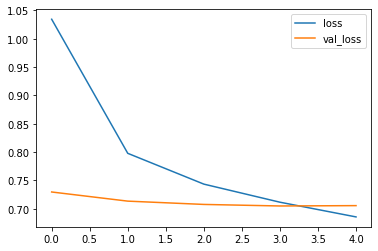

In [11]:
loss = pd.DataFrame(model.history.history)

loss[['loss', 'val_loss']].plot()

Final training loss= 0.68

Final validation loss = 0.70

In [13]:
#Saving the model
model.save('model.h5')